<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Ames, Iowa prediction price Kaggle competition

----

## Problem statement

My research aims to describe several factors that may affect the price of  houses in Ames Iowa. I specifically focus on which towns in Ames had the highest sales rate between 2006-2010. The findings will be represented in a table with information about the model of linear regression to try to predict home values.

## Data descreption

Description of the data [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

## Process 

To begin with the analysis of this research, the data will first be cleaned and organized to have more exact information. Then, the price of the houses will be analyzed concerning some features using a boxplot. Then, various types of graphs will be used to analyze the price and the neighborhoods to check if there is any change in the price of the houses concerning the neighborhoods. Finally, the best features will be chosen to predict the price of housing using regression models.

## Agenda


1. Libraries
2. Data import and cleaning
3. Visualization
4. Data analysis
5. Feature engineering
6. Feature engineering
7. Creating models
8. Conclusions

## 1. Libraries:

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

plt.style.use('seaborn-whitegrid')

## 2. Data Import and Cleaning:
---

In [2]:
#Import datasets from the folder

pd.set_option('display.max_columns', None) # to see all the columns on my dataframe
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
# TRAINING
# Checking for null values
null_columns = train.columns[train.isnull().any()]#https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null
train[null_columns].isnull().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [4]:
# TESTING
# Checking for null values
null_colum = test.columns[test.isnull().any()]#https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null
test[null_colum].isnull().sum()

Lot Frontage      160
Alley             820
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Electrical          1
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Pool QC           874
Fence             706
Misc Feature      837
dtype: int64

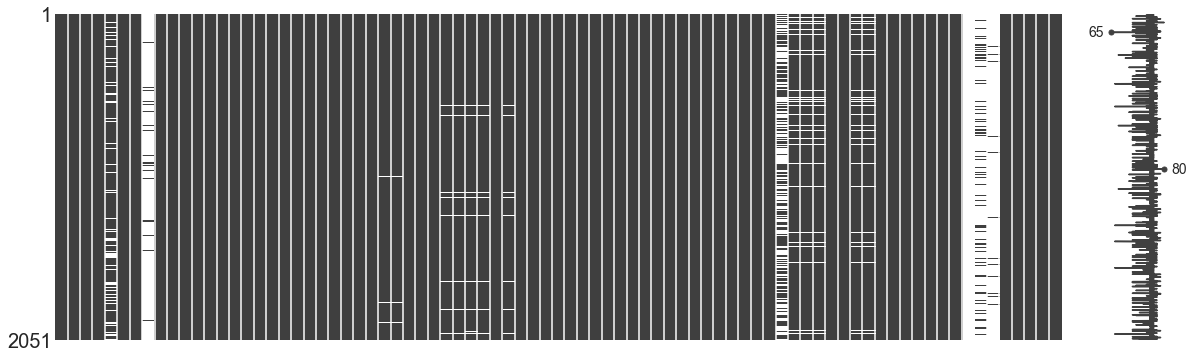

In [5]:
# Graphic null with the missingno library 
missingno.matrix(train,figsize = (20,6));

In [6]:
train.shape

(2051, 81)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [8]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


- Analyzing the information above, we observe that some of the features have more than 75% of null values, the most recommended in this case is to drop these features and fill the other features with fewer null values with average values.
- In the table above we have the description of the numerical features with the average, maximum, minimum, etc. values. the median home price in Ames was $181,469, the lowest price was 12,789, and the highest value was 611,657. In this table, we can find more data about other features as well.




## 2.1.  Data cleaning:


In [9]:
#TRAINING
#dropping some columns 

train.drop(['PID',"Alley",'Fireplace Qu','Pool QC','Fence','Misc Feature'],axis=1,inplace=True)


In [10]:
#TESTING
#dropping some columns 
test.drop(['PID',"Alley",'Fireplace Qu','Pool QC','Fence','Misc Feature'],axis=1,inplace=True)


In [11]:
#TRAINIG
# fill null values
train['Lot Frontage'].fillna(train['Lot Frontage'].mean(),inplace=True)

train['Mas Vnr Type'].fillna('None',inplace=True)
train['Mas Vnr Area'].fillna(0.0, inplace=True)

train['Bsmt Qual'].fillna("Na",inplace=True)
train['Bsmt Cond'].fillna('Na',inplace=True)
train['Bsmt Exposure'].fillna('Na',inplace=True)
train['BsmtFin Type 1'].fillna('Na',inplace=True)
train['BsmtFin Type 2'].fillna('Na',inplace=True)

train['BsmtFin SF 1'].fillna(0.0,inplace=True)
train['BsmtFin SF 2'].fillna(0.0,inplace=True)
train['Bsmt Unf SF'].fillna(0.0,inplace=True)
train['Total Bsmt SF'].fillna(0.0,inplace=True)


train['Bsmt Full Bath'].fillna(0.0,inplace=True)
train['Bsmt Half Bath'].fillna(0.0,inplace=True)

train['Garage Type'].fillna("Na",inplace=True)
train['Garage Yr Blt'].fillna(0.0,inplace=True)
train['Garage Finish'].fillna("Na",inplace=True)
train['Garage Cars'].fillna(0.0,inplace=True)
train['Garage Area'].fillna(0.0,inplace=True)
train['Garage Qual'].fillna("Na",inplace=True)
train['Garage Cond'].fillna("Na",inplace=True)

In [12]:
#TESTING
# fill null values
test['Lot Frontage'].fillna(test['Lot Frontage'].mean(),inplace=True)

test['Mas Vnr Type'].fillna('None',inplace=True)
test['Mas Vnr Area'].fillna(0.0, inplace=True)

test['Bsmt Qual'].fillna("Na",inplace=True)
test['Bsmt Cond'].fillna('Na',inplace=True)
test['Bsmt Exposure'].fillna('Na',inplace=True)
test['BsmtFin Type 1'].fillna('Na',inplace=True)
test['BsmtFin Type 2'].fillna('Na',inplace=True)

test['Electrical'].fillna('SBrkr',inplace=True)

test['Garage Type'].fillna("Na",inplace=True)
test['Garage Yr Blt'].fillna(0.0,inplace=True)
test['Garage Finish'].fillna("Na",inplace=True)
test['Garage Qual'].fillna("Na",inplace=True)
test['Garage Cond'].fillna("Na",inplace=True)

In [13]:
train.shape

(2051, 75)

- As mentioned before, the features that had more than 75% null values were dropped, and the other features were filled with values of '0.0' and 'NA’. In total, in the end, the same number of rows continued to be preserved, but the number of columns was reduced to a total of 75.


## 3. Feature Visualizations:
---

#### Price

In [14]:
# Price description
train[['SalePrice']].describe()

,SalePrice
count,2051.000000
mean,181469.701609
std,79258.659352
min,12789.000000
25%,129825.000000
50%,162500.000000
75%,214000.000000
max,611657.000000


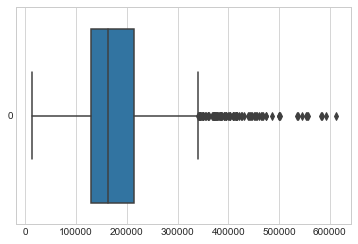

In [15]:
# Box plot target
sns.boxplot(data=train['SalePrice'],orient='h');
plt.savefig('../images/target_box.png')

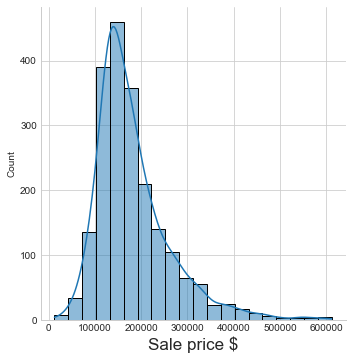

In [16]:
# Histogram and distribution of the target
sns.displot(train['SalePrice'],bins=20,kde = True).set_axis_labels
plt.xlabel('Sale price $',fontdict={'fontsize':17});
plt.savefig('../images/target_histagram.png')

- In the price description table, we have the values in more detail, from the maximum, minimum, average values, etc.
- Comparing the data obtained in the boxplot graphs and the price histogram, we observe that most houses are in the range of $100000 and 200,000 dollars and with maximum values of 600,000. We also see that the price has a positive skew, this indicates that there are more values higher than the average price.

#### Numerical and categorical features

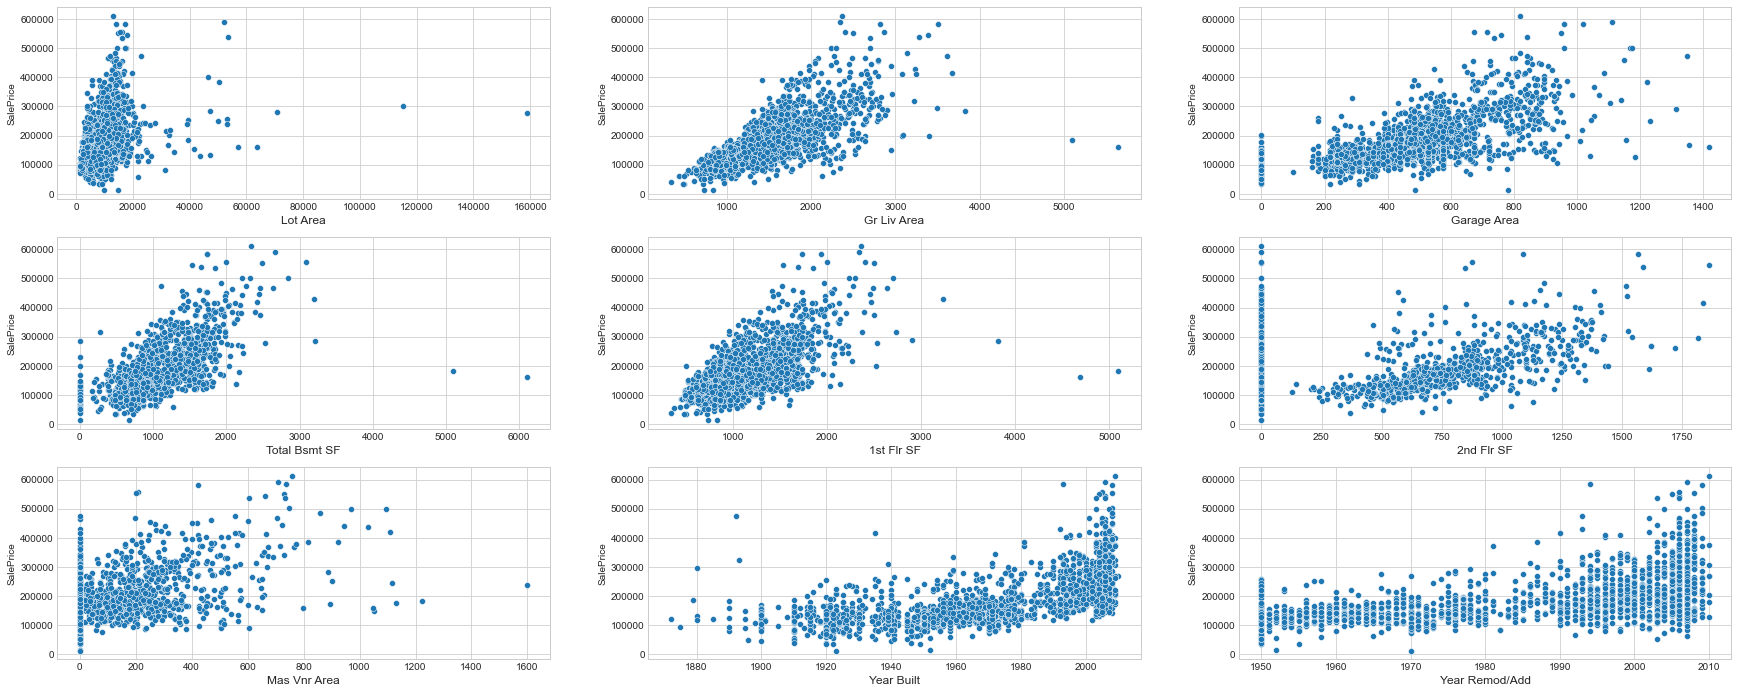

In [43]:
# plot of the Continuous features

fig, axs = plt.subplots(3,3,figsize=(30, 12))
sns.scatterplot(y=train['SalePrice'],x=train['Lot Area'],ax=axs[0,0]).xaxis.label.set_size(12)
sns.scatterplot(y=train['SalePrice'],x=train['Gr Liv Area'],ax=axs[0,1]).xaxis.label.set_size(12)
sns.scatterplot(y=train['SalePrice'],x=train['Garage Area'],ax=axs[0,2]).xaxis.label.set_size(12)
sns.scatterplot(y=train['SalePrice'],x=train['Total Bsmt SF'],ax=axs[1,0]).xaxis.label.set_size(12)
sns.scatterplot(y=train['SalePrice'],x=train['1st Flr SF'],ax=axs[1,1]).xaxis.label.set_size(12)
sns.scatterplot(y=train['SalePrice'],x=train['2nd Flr SF'],ax=axs[1,2]).xaxis.label.set_size(12)
sns.scatterplot(y=train['SalePrice'],x=train['Mas Vnr Area'],ax=axs[2,0]).xaxis.label.set_size(12)
sns.scatterplot(y=train['SalePrice'],x=train['Year Built'],ax=axs[2,1]).xaxis.label.set_size(12)
sns.scatterplot(y=train['SalePrice'],x=train['Year Remod/Add'],ax=axs[2,2]).xaxis.label.set_size(12)

plt.savefig('../images/graph_continuous.png')


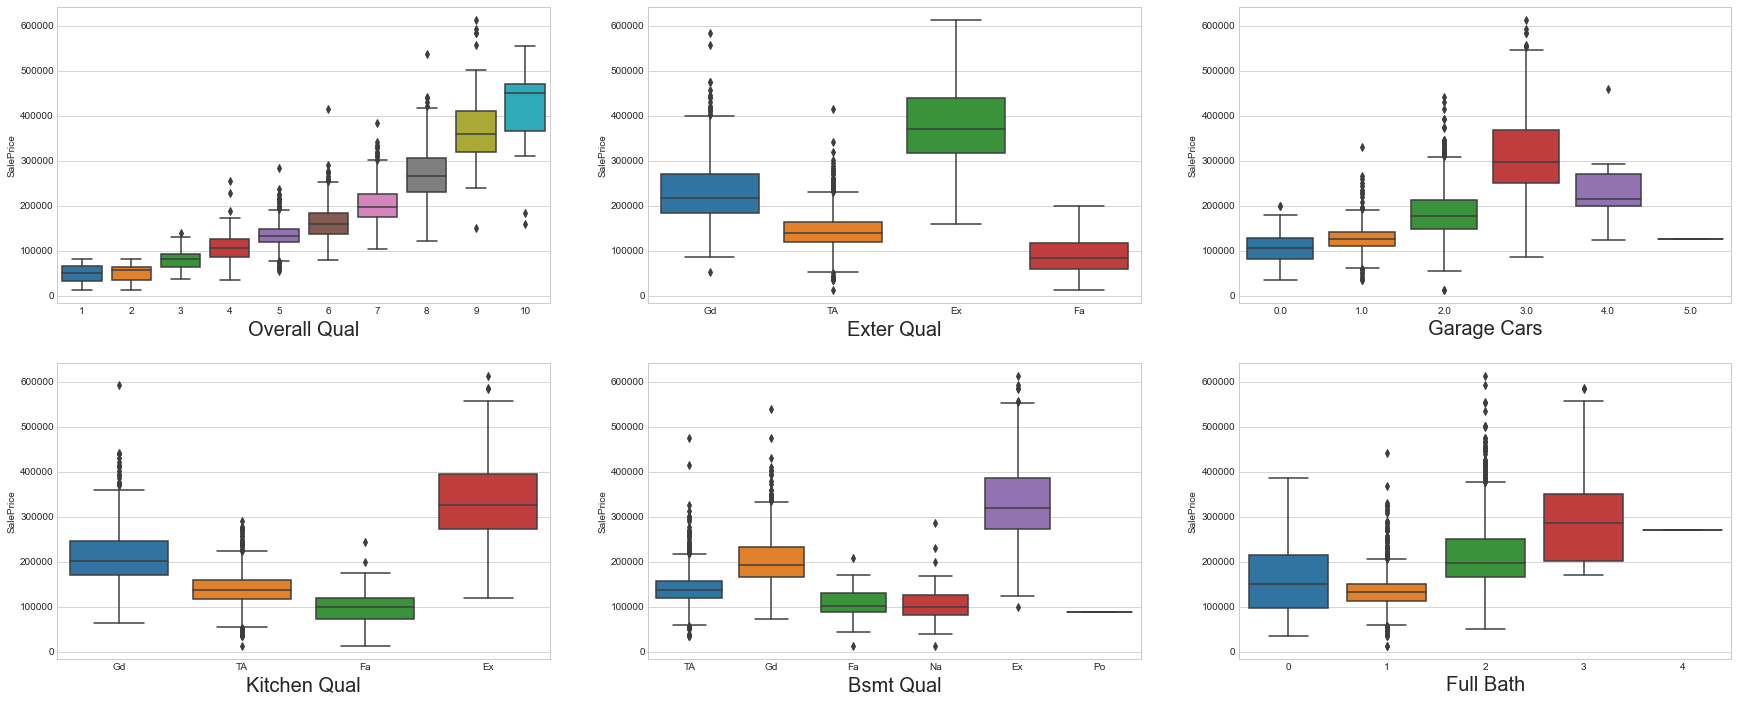

In [44]:
# plot of the Categorical features

fig, axs = plt.subplots(2,3,figsize=(30, 12))

sns.boxplot(y=train['SalePrice'],x=train['Overall Qual'],ax=axs[0,0]).xaxis.label.set_size(20)


sns.boxplot(y=train['SalePrice'],x=train['Exter Qual'],ax=axs[0,1]).xaxis.label.set_size(20)


sns.boxplot(y=train['SalePrice'],x=train['Garage Cars'],ax=axs[0,2]).xaxis.label.set_size(20)


sns.boxplot(y=train['SalePrice'],x=train['Kitchen Qual'],ax=axs[1,0]).xaxis.label.set_size(20)


sns.boxplot(y=train['SalePrice'],x=train['Bsmt Qual'],ax=axs[1,1]).xaxis.label.set_size(20)


sns.boxplot(y=train['SalePrice'],x=train['Full Bath'],ax=axs[1,2]).xaxis.label.set_size(20)


plt.savefig('../images/categorical_box.png')
plt.show()


- Observing the price graph in relation to some numerical features, we can say that there are some features that have a regression line, however we have some outliers that must be removed to have a better prediction.
- In the boxplot chart we select different categorical features to see and analyze how the price value changes. In this graph we see that the Overall Qual is one of the most relevant for this model. Also, as in the previous graph we see that there are several outliers that have to be removed.

## 3.1 Removing Outliers


In [45]:
train.drop(index=train[train['Total Bsmt SF']>5000].index,inplace=True)
train.drop(index=train[train['Lot Area']>45000].index,inplace=True)

train.drop(index=train[(train['Overall Qual']==8)&(train['SalePrice']>500000)].index,inplace=True)
train.drop(index=train[(train['Overall Qual']==6)&(train['SalePrice']>400000)].index,inplace=True)
train.drop(index=train[(train['Overall Qual']==9)&(train['SalePrice']>550000)].index,inplace=True)
train.drop(index=train[(train['Overall Qual']==4)&(train['SalePrice']>200000)].index,inplace=True)
train.drop(index=train[train['Garage Area']==0].index,inplace=True)


test.drop(index=test[test['Total Bsmt SF']>5000].index,inplace=True)
test.drop(index=test[test['Garage Area']==0].index,inplace=True)

- now our features look much better after dropping some of the *outliers*, and now we can proceed to implement our models

## 4. Data Analysis:
---

#### Prices of the house by neighborhood 

In [46]:
#Description table
train.groupby('Neighborhood')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,22.0,200417.681818,27447.004922,159895.0,180250.00,192250.0,218742.50,264561.0
Blueste,6.0,144566.666667,26089.589239,121000.0,123925.00,137500.0,159625.00,185000.0
BrDale,18.0,104030.555556,11204.950834,85400.0,96250.00,105750.0,111937.50,122500.0
BrkSide,67.0,133245.149254,31074.145579,68500.0,114750.00,128500.0,146500.00,223500.0
ClearCr,21.0,205558.666667,52203.428214,130000.0,164000.00,192000.0,241500.00,328000.0
CollgCr,178.0,203381.455056,53672.021266,110000.0,167418.75,200000.0,225750.00,475000.0
Crawfor,71.0,205901.211268,60856.738509,90350.0,158250.00,199500.0,235250.00,392500.0
Edwards,109.0,132235.467890,45175.892230,35000.0,108500.00,125200.0,144000.00,320000.0
Gilbert,115.0,189717.330435,32143.769062,141000.0,172592.50,181000.0,194250.00,377500.0


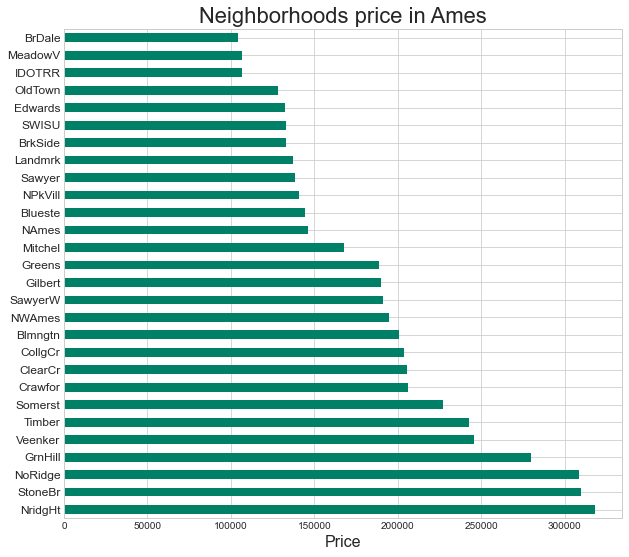

In [61]:
#graphic of the neighborhood 

plt.figure(figsize=(10, 9))
train.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).plot(kind='barh',colormap='summer');
plt.title('Neighborhoods price in Ames',fontdict={'fontsize':22})
plt.ylabel('');
plt.xlabel('Price',fontdict={'fontsize':16});
plt.yticks(fontsize=12)
plt.savefig('../images/bar_neighborhood_price.png')


- In the previous graph we can analyze that there are a total of 28 neighborhoods in Ames, Iowa. For the purpose of this analysis we are going to focus on the 3 most expensive neighborhoods (Stone Brook, Northridge Heights and Northridge) with an average greater than $300,000.

In [57]:
#Top 3 neighborhoods
top_3_neighborhood=train[train['Neighborhood'].isin(['NridgHt','NoRidge','StoneBr'])].copy()
top_3_neighborhood['Neighborhood'].replace({"NridgHt": "Northridge Heights", "NoRidge": "Northridge","StoneBr":'Stone Brook'}, inplace=True)


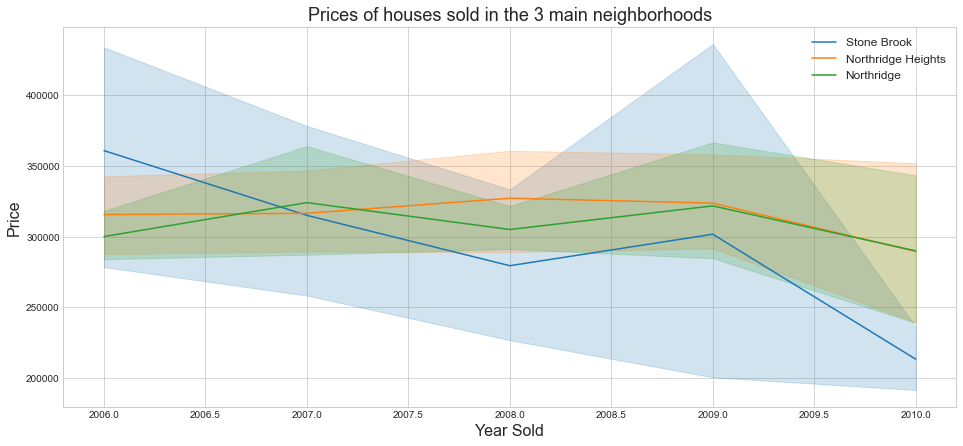

In [60]:
plt.figure(figsize=(16, 7))

sns.lineplot(x='Yr Sold', y= 'SalePrice',hue='Neighborhood',data= top_3_neighborhood)
plt.title('Prices of houses sold in the 3 main neighborhoods',fontdict={'fontsize':18});
plt.ylabel('Price',fontdict={'fontsize':16});
plt.xlabel('Year Sold',fontdict={'fontsize':16});
plt.legend(fontsize=12);
plt.savefig('../images/top_3-neighborhoods_sold.png')


- In the graph above, the price of houses sold between 2006 and 2010 is distributed. The first thing we see is that in this period prices have been decreasing. We can also observe two critical points which are the year 2008 and 2009, where we see that there have been changes in prices.

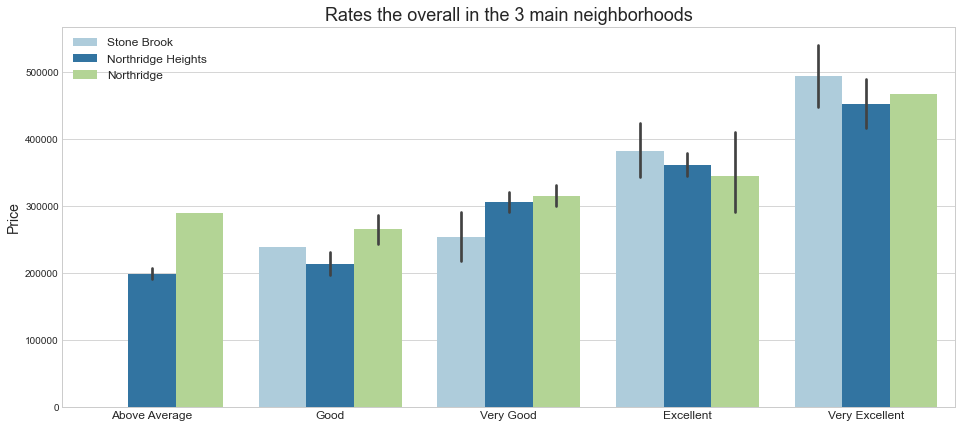

In [62]:
plt.figure(figsize=(16, 7))

ax=sns.barplot(y='SalePrice',x='Overall Qual',data=top_3_neighborhood, hue='Neighborhood',palette="Paired")
plt.title('Rates the overall in the 3 main neighborhoods',fontdict={'fontsize':18});
plt.xticks(fontsize=12)
ax.set_xticklabels(['Above Average','Good','Very Good','Excellent','Very Excellent'])
plt.xlabel('');
plt.ylabel('Price',fontdict={'fontsize':14});
ax.legend(loc='upper left',fontsize=12);
plt.savefig('../images/top_3 neighborhoods_overall.png')


- This graph represents the overall rating of the 3 neighborhoods to be analyzed. We can see that these neighborhoods have an excellent rating. We also see that the Stone Brook neighborhood is the one with the best overall rating.

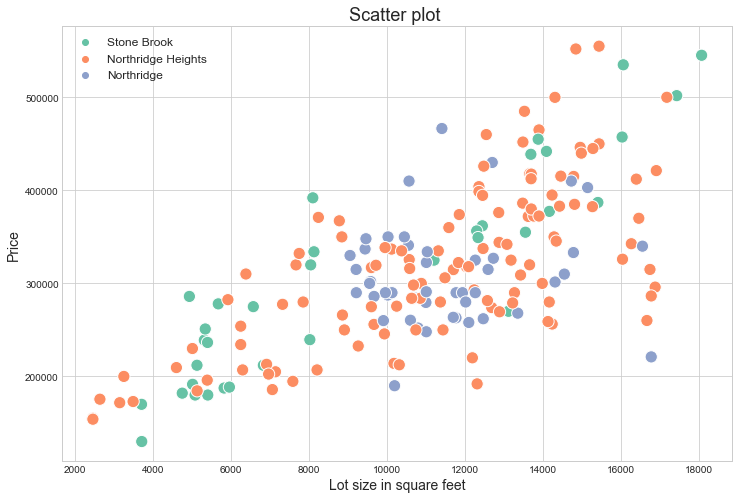

In [65]:
#  Graphic Scatter plot of neighbourhood by price and lot size
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="Lot Area", y="SalePrice",hue="Neighborhood",palette='Set2',data=top_3_neighborhood,s=150)
plt.title('Scatter plot ',fontdict={'fontsize':18});
plt.xlabel('Lot size in square feet',fontdict={'fontsize':14});

plt.ylabel('Price',fontdict={'fontsize':14});
plt.legend(fontsize=12);
plt.savefig('../images/scatterplot_price.png')


- When analyzing the size of the properties with respect to price, we see that the neighborhoods of Stone Brook and Northridge Heights are neighborhoods where houses of various prices and a great variety of sizes can be found. On the other hand the Northridge neighborhood does not have the same availability in house size and we can see how the size of the houses are in a small group between 9000 and 15000 square feet.


## 5. Feature engineering:
---

In [66]:
# Transformation of type

cols = [
    'MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 
    'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
    'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type','Mas Vnr Area', 'Exter Qual', 
    'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
        'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual',
    'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive',
    'Sale Type']

train[cols] = train[cols].astype('category')
test[cols] = test[cols].astype('category')


In [67]:
#Encode categorical features

#instance encoder
encoder = OrdinalEncoder() 
encoder1 = OrdinalEncoder() 

encoder.fit(train[cols])
encoder1.fit(test[cols])

train[cols] = encoder.transform(train[cols])
test[cols] = encoder1.transform(test[cols])

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1916 entries, 0 to 2050
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1916 non-null   int64  
 1   MS SubClass      1916 non-null   int64  
 2   MS Zoning        1916 non-null   float64
 3   Lot Frontage     1916 non-null   float64
 4   Lot Area         1916 non-null   int64  
 5   Street           1916 non-null   float64
 6   Lot Shape        1916 non-null   float64
 7   Land Contour     1916 non-null   float64
 8   Utilities        1916 non-null   float64
 9   Lot Config       1916 non-null   float64
 10  Land Slope       1916 non-null   float64
 11  Neighborhood     1916 non-null   float64
 12  Condition 1      1916 non-null   float64
 13  Condition 2      1916 non-null   float64
 14  Bldg Type        1916 non-null   float64
 15  House Style      1916 non-null   float64
 16  Overall Qual     1916 non-null   int64  
 17  Overall Cond  

- Using the "OrdinalEncoder" library we can make the transformation of the categorical variables to be able to use them in our future model.

- now our dataframe is clean and all variables are numeric. 

## 6. Feature selection and correlation graphic:
---

In [69]:
#target variable

y=train['SalePrice']

- ### Two ways selecting features for X

1. SelectKBest from skylearn

In [70]:
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(train,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 21 best features

         Features        Score
16   Overall Qual  3713.074636
45    Gr Liv Area  2062.013642
26     Exter Qual  1718.754391
52   Kitchen Qual  1484.935629
37  Total Bsmt SF  1464.045465
59    Garage Cars  1405.286229
60    Garage Area  1371.225397
42     1st Flr SF  1336.181603
29      Bsmt Qual  1050.256846
18     Year Built   946.200209


2. Correlation table

In [71]:
# using the correlation of price 
matrix = train.corr()
values = matrix["SalePrice"].sort_values(ascending=False)

top_10 = values[:10]
bottom_10 = values[-10:]

print(f"top_10\n{top_10}")
print(f"bottom_10\n{bottom_10}")

top_10
SalePrice         1.000000
Overall Qual      0.812317
Gr Liv Area       0.720148
Total Bsmt SF     0.658331
Garage Cars       0.650669
Garage Area       0.646058
1st Flr SF        0.641178
Year Built        0.575166
Year Remod/Add    0.555559
Garage Yr Blt     0.546355
Name: SalePrice, dtype: float64
bottom_10
Overall Cond    -0.132473
MS Zoning       -0.144290
Lot Shape       -0.286856
Bsmt Exposure   -0.325685
Garage Type     -0.389730
Heating QC      -0.443655
Garage Finish   -0.539748
Bsmt Qual       -0.595237
Kitchen Qual    -0.660971
Exter Qual      -0.687842
Name: SalePrice, dtype: float64


In [72]:
#feature variables
features=['Overall Qual','Gr Liv Area','Exter Qual','Garage Area','Kitchen Qual',
         'Total Bsmt SF','1st Flr SF','Bsmt Qual','Year Built','Year Remod/Add','Full Bath',
         'Mas Vnr Area']
X=train[features]

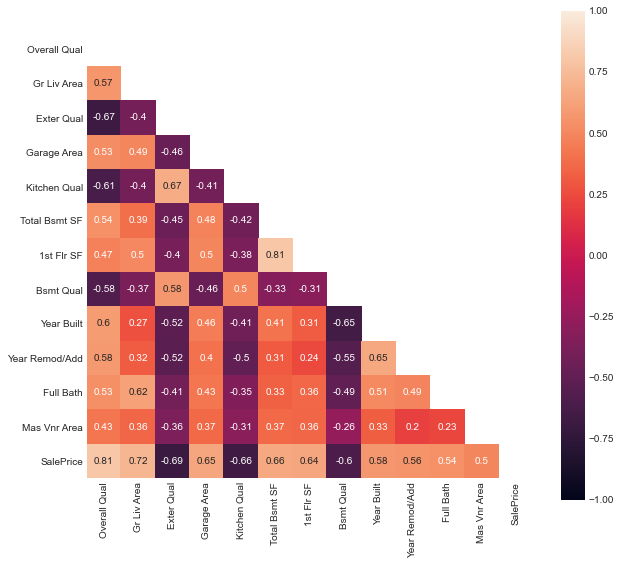

In [73]:
#heat map to find the correlation 

heat=train[['Overall Qual','Gr Liv Area','Exter Qual','Garage Area','Kitchen Qual',
         'Total Bsmt SF','1st Flr SF','Bsmt Qual','Year Built','Year Remod/Add','Full Bath',
         'Mas Vnr Area','SalePrice']]

corr =heat.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(10, 9))
sns.heatmap(heat.corr(),vmin=-1,
    vmax=1,
    cmap=None,
    mask=mask,
    center=None,
    robust=False,
    annot=True,
    annot_kws=None,
    linecolor='white',
    square=True,);

plt.savefig('../images/corr.png')


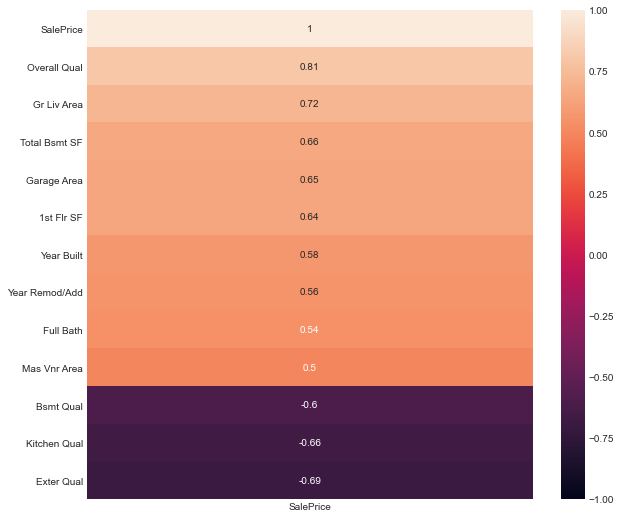

In [74]:
#Grafic of correlation of independent variables with the dependent Variable 
#I took a piece of the code from (https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)

plt.figure(figsize=(10, 9))
sns.heatmap(heat.corr()
            [['SalePrice']].sort_values(
                by='SalePrice', ascending=False),
            vmin=-1, 
            vmax=1, 
            annot=True, 
            cmap=None)
plt.savefig('../images/corr_price.png')


- we assign the variable value of *SalePrice* as our target.

- With the help of the *sklearn* library we can use the *SelectKbest * module to select the 10 best features. We can also use the correlation table to see which features have the highest correlation.

- I have chosen the 12 best features that had high and low correlation.

- At the end we can see the correlation that have the 10 best features, and we see the *Overall Qual* has the highest correlation.

## 7. Creating models:
---

# Frist version for Kaggle

- ### Linear regression model: Sklearn model
---

#### Model Prep: Train/test split and Scale

In [75]:
#split our data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=42)

In [76]:
#scale our data

ss = StandardScaler()

X_train= ss.fit_transform(X_train) 

X_test= ss.transform(X_test)

#### Model Prep: Instantiate our model


In [77]:
#Instantiate our model.
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

#### Cross validation

In [78]:
# Training Testing Cross Val

print(f'Cross validation training: {cross_val_score(linreg, X_train, y_train).mean()}')
print(f'Cross validation test: {cross_val_score(linreg, X_test, y_test).mean()}')

Cross validation training: 0.8580408179780091
Cross validation test: 0.86785251788978


#### Intercept and coefficient 

In [79]:
print(f'Intercept: {linreg.intercept_}')

Intercept: 183513.8590604027


In [80]:
pd.DataFrame(list(zip(features, linreg.coef_)), columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
1,Gr Liv Area,26452.781694
0,Overall Qual,15592.675187
5,Total Bsmt SF,12799.171113
3,Garage Area,7180.391264
8,Year Built,5523.652183
9,Year Remod/Add,4774.706166
11,Mas Vnr Area,4315.381237
6,1st Flr SF,3988.732243
7,Bsmt Qual,-3986.910476
10,Full Bath,-7121.821863


#### Prediction Metrics and Residuals


In [81]:
#create predictions
train_preds = linreg.predict(X_train)
test_preds = linreg.predict(X_test)

In [82]:
# Training score
print(f'R2 score training: {linreg.score(X_train, y_train)}')
print(f'R2 score test: {linreg.score(X_test, y_test)}')

R2 score training: 0.8642218807870232
R2 score test: 0.8724352254356168


In [83]:
# Via sklearn.metrics
print(f'MAE training: {metrics.mean_absolute_error(y_train, train_preds)}')
print(f'MAE testing: {metrics.mean_absolute_error(y_test, test_preds)}')


MAE training: 20358.493813460092
MAE testing: 20428.007907121868


In [84]:
# RMSE - without using NumPy
# squared=False gives us the square root
print(f'RMSE training: {metrics.mean_squared_error(y_train, train_preds, squared = False)}')
print(f'RMSE testing: {metrics.mean_squared_error(y_test, test_preds, squared = False)}')



RMSE training: 27854.67952184763
RMSE testing: 26937.05781456702


In [85]:
# calculate residuals
residuals = y_train - train_preds
# mean of residuals
residuals.mean()

-1.9359147477558885e-11

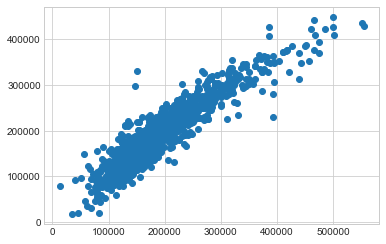

In [86]:
plt.scatter(y_train, train_preds);
plt.savefig('../images/pred1.png')


# Table of metrics for the first version kaggle competition

|          | cross_val_score | R-Squared | MAE      | RMSE      |
|----------|-----------------|-----------|----------|-----------|
| Training | 0.8580          | 0.8642   | 20358.4 | 27854.67 |
| Testing  | 0.8678         | 0.8724   | 20428 | 26937.05 |

- As we can see in the first regression model, the metrics are slightly overfitting. The performance of the model, in general, is not as bad as the R-Squared indicates, which is 86%. Another metric to consider in this model is the RMSE which indicates that the model is 27854 off. Analyzing these metrics, we could determine that the model could improve the performance.

## Ridge and Lasso:

#### Ridge 

In [87]:
#Instantiate
ridge_model = Ridge(alpha=10)

#Fit
ridge_model.fit(X_train, y_train)

# Evaluate model using R2.
print(f"Ridge Training R-Squared: {ridge_model.score(X_train, y_train)}")
print(f"Ridge Testing R-Squared: {ridge_model.score(X_test, y_test)}")

Ridge Training R-Squared: 0.8642001611928016
Ridge Testing R-Squared: 0.8724608101596055


### Prediction and Metrics for RIDGE

In [88]:
#create predictions
train_preds_ridge = ridge_model.predict(X_train)
test_preds_ridge = ridge_model.predict(X_test)

In [89]:
# RMSE 
print(f'RMSE training: {metrics.mean_squared_error(y_train, train_preds_ridge, squared = False)}')
print(f'RMSE testing: {metrics.mean_squared_error(y_test, test_preds_ridge, squared = False)}')

RMSE training: 27856.907304010172
RMSE testing: 26934.35639581381


In [90]:
# Via sklearn.metrics
print(f'MAE training: {metrics.mean_absolute_error(y_train, train_preds_ridge)}')
print(f'MAE testing: {metrics.mean_absolute_error(y_test, test_preds_ridge)}')

MAE training: 20346.72752742447
MAE testing: 20398.22419719756


#### Lasso

In [91]:
#Instantiate
lasso_model =Lasso(alpha=5)

#Fit
lasso_model.fit(X_train, y_train)

# Evaluate model using R2.
print(f"lasso Training R-Squared: {lasso_model.score(X_train, y_train)}")
print(f"Lasso Testing R-Squared: {lasso_model.score(X_test, y_test)}")

lasso Training R-Squared: 0.864221838298056
Lasso Testing R-Squared: 0.8724325219341309


### Prediction and Metrics for LASSO

In [92]:
#create predictions
train_preds_lasso = lasso_model.predict(X_train)
test_preds_lasso = lasso_model.predict(X_test)

In [93]:
# RMSE 
print(f'RMSE training: {metrics.mean_squared_error(y_train, train_preds_lasso, squared = False)}')
print(f'RMSE testing: {metrics.mean_squared_error(y_test, test_preds_lasso, squared = False)}')

RMSE training: 27854.683880121564
RMSE testing: 26937.3432538281


In [94]:
# Via sklearn.metrics
print(f'MAE training: {metrics.mean_absolute_error(y_train, train_preds_lasso)}')
print(f'MAE testing: {metrics.mean_absolute_error(y_test, test_preds_lasso)}')

MAE training: 20357.66485615361
MAE testing: 20426.978481761573


# Table of metrics Ridge and Lasso

|           | RIDGE                          | LASSO                          |
|-----------|--------------------------------|--------------------------------|
| R-Squared | Train: 0.864 / Test: 0.872     | Train: 0.864 / Test: 0.872    |
| RMSE      | Train: 27856.90 / Test: 26934.35 | Train: 27854.6 / Test: 26937.3 |
| MAE       | Train: 20346.72 / Test: 20398.22 | Train: 20357.66 / Test: 20426.97 |

- Comparing these two regression models (Ridge and Lasso), we see that they are also a bit overfitting and also have a little better performance than the previous model (linear regression) as shown by the metrics.


# Second version for Kaggle

- ### Linear regression model: Sklearn, Polynomial features and Ridge
---

In [95]:
# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(include_bias = False, degree=2, interaction_only=False)

# Fit and transform our X data.
X_overfit = poly.fit_transform(X)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_overfit, y, test_size=.7, random_state=42)

In [97]:
# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [98]:
ols = LinearRegression()
ols.fit(Z_train, y_train)

LinearRegression()

#### Prediction Metrics and Residuals


In [99]:
#create predictions
train_predic = ols.predict(Z_train)
test_predic = ols.predict(Z_test)

In [100]:
# calculate residuals
resids = y_train - train_predic
# mean of residuals
resids.mean()

-1.3563196249436003e-10

In [101]:
# Training score
print(f'R2 score training: {ols.score(Z_train, y_train)}')
print(f'R2 score test: {ols.score(Z_test, y_test)}')

R2 score training: 0.9227485888724317
R2 score test: 0.8598309022496265


In [102]:
# Via sklearn.metrics
print(f'MAE training: {metrics.mean_absolute_error(y_train, train_predic)}')
print(f'MAE testing: {metrics.mean_absolute_error(y_test, test_predic)}')


MAE training: 15471.93178509351
MAE testing: 19556.150698996425


In [103]:
# RMSE 
print(f'RMSE training: {metrics.mean_squared_error(y_train, train_predic, squared = False)}')
print(f'RMSE testing: {metrics.mean_squared_error(y_test, test_predic, squared = False)}')



RMSE training: 21166.386117284495
RMSE testing: 28185.153149271886


#### Ridge 

In [104]:
#Instantiate
ridge_model = Ridge(alpha=10)

#Fit
ridge_model.fit(Z_train, y_train)

# Evaluate model using R2.
print(f"Ridge Training R-Squared: {ridge_model.score(Z_train, y_train)}")
print(f"Ridge Testing R-Squared: {ridge_model.score(Z_test, y_test)}")

Ridge Training R-Squared: 0.9098606204311415
Ridge Testing R-Squared: 0.8870172443178214


In [105]:
#create predictions
train_predic = ridge_model.predict(Z_train)
test_predic = ridge_model.predict(Z_test)

In [106]:
# Via sklearn.metrics
print(f'MAE training: {metrics.mean_absolute_error(y_train, train_predic)}')
print(f'MAE testing: {metrics.mean_absolute_error(y_test, test_predic)}')

MAE training: 16631.154612498005
MAE testing: 17452.55088807506


In [107]:
# RMSE 
print(f'RMSE training: {metrics.mean_squared_error(y_train, train_predic, squared = False)}')
print(f'RMSE testing: {metrics.mean_squared_error(y_test, test_predic, squared = False)}')

RMSE training: 22863.924948346863
RMSE testing: 25304.650398541697


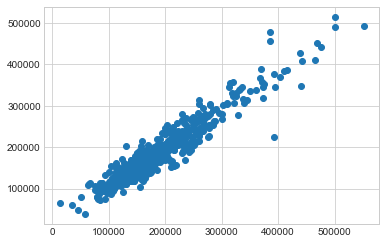

In [108]:

plt.scatter(y_train, train_predic);
plt.savefig('../images/pred2.png')

# Table of metrics for the second version kaggle competition

|           | LINEAR REGRESION                          | RIDGE                          |
|-----------|--------------------------------|--------------------------------|
| R-Squared | Train: 0.922 / Test: 0.859     | Train: 0.909 / Test: 0.887    |
| RMSE      | Train: 21166.38 / Test: 28185.15 | Train: 22863.92 / Test: 25304.65 |
| MAE       | Train: 15471.93 / Test: 19556.15 | Train: 16631.15 / Test: 17452.55 |

- When looking at these two models (Linear regression and Ridge), we notice that they have more overfitting than all the previous models, this is because polynomial features were used to increase the number of features for these models. The metrics also indicate that the performance increased by 85.5% for the Linear regression model and 88.7% for the Ridge model.

## Kaggle submission 
---

# First version

In [109]:
tra = ss.fit_transform(test[features])
kaggle_preds = linreg.predict(tra)

In [110]:
test['saleprice'] = kaggle_preds

In [111]:
# Checking the data
test[['Id','saleprice']]

,Id,saleprice
0,2658,184685.499136
1,2718,214164.603785
2,2414,190835.989337
3,1989,129797.813269
4,625,183548.315018
...,...,...
873,1662,172360.712063
874,1234,221196.646400
875,1373,126860.503166
876,1672,99696.955787


# Second version

In [112]:
# Using our transformer from above
kaggle_poly = poly.transform(test[features])
kag = sc.fit_transform(kaggle_poly)

In [113]:
# Making predictions
kaggle_preds = ols.predict(kag)

In [114]:
# Assigning to dataframe
test['saleprice'] = kaggle_preds

In [115]:
# Checking the data
test[['Id','saleprice']]

,Id,saleprice
0,2658,126352.015978
1,2718,159969.776352
2,2414,163778.838731
3,1989,156087.061030
4,625,203863.380404
...,...,...
873,1662,180434.503823
874,1234,194654.501956
875,1373,145340.179547
876,1672,122088.572601


In [116]:
# Exporting 
test[['Id','saleprice']].to_csv('../datasets/kaggle_sub.csv', index=False)

## Conclusions:
---

To conclude this analysis of house prices in Ames, Iowa, we find that after cleaning and organizing the data, house prices can vary from $12,789 to 611,657, depending on the features observed in the previous graphs.

Stone Brook, Northridge Heights and Northridge were the neighborhoods that had the most expensive average house prices, also these neighborhoods have a high overall rating as shown in the graph.

In the first regression models (Linear regression, Ridge, and Lasso) the metrics were quite similar, the models are slightly overfitting, and the performance was not so bad. To try to improve the model, the features were increased using Sklearn (PolynomialFeatures), this improved the performance up to 88.7% but increased the overfitting as expected, also decreased the value of RMSE and MAE.

I personally think that increasing the number of features is a good idea to improve the model. Different types of regression models such as decision tree or Random Forest could also be explored.